#### 로지스틱 손실함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [5]:
# 예측확률값
y_hat = np.linspace(0.001, 0.999, 100)  # 0.001~0.999 데이터 100개 생성

# 실제정답
y_true_1 = 1
y_true_0 = 0

# 로지스틱 손실함수 정의
def logistic_loss(y, y_hat):
    return - (y * np.log(y_hat) + (1- y) * np.log(1 - y_hat))

# 손실값 계산
loss_1 = logistic_loss(y_true_1, y_hat)
loss_0 = logistic_loss(y_true_0, y_hat)


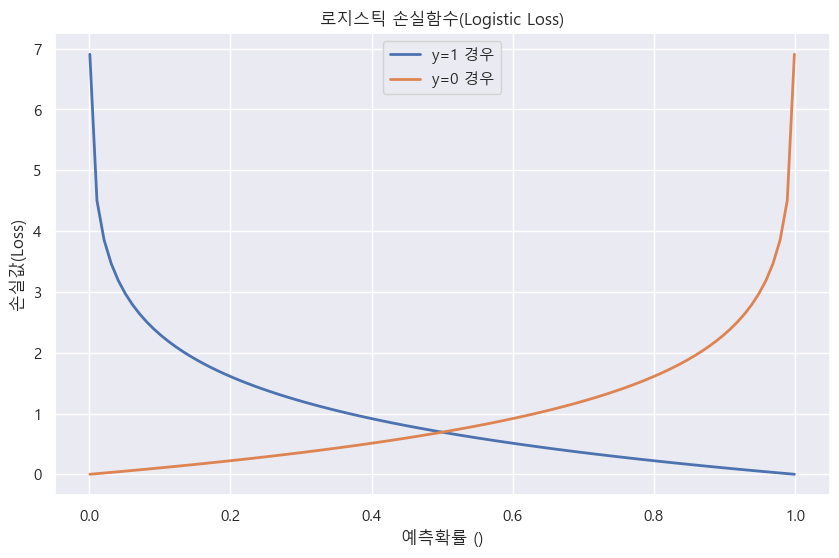

In [13]:
plt.figure(figsize=(10,6))
plt.plot(y_hat, loss_1, label='y=1 경우', linewidth=2)
plt.plot(y_hat, loss_0, label='y=0 경우', linewidth=2)
plt.xlabel('예측확률 ()') 
plt.ylabel('손실값(Loss)')
plt.title('로지스틱 손실함수(Logistic Loss)')
plt.legend()
plt.show()

#### SGD 실습
- 기준데이터 로드

In [14]:
import pandas as pd

In [17]:
fish = pd.read_csv('https://bit.ly/fish_csv') # 인터넷을 통해 다운로드 후 로드
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [23]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [24]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target  = train_test_split(fish_input, fish_target, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

- 확률적 경사하강법 알고리즘 사용

In [28]:
from sklearn.linear_model import SGDClassifier

In [121]:
# 손실함수 로직스틱 손실함수 사용
# 반복횟수(epoch) 10번하면 ConvergenceWarning 발생(반복횟수 부족 적어도 40번은 반복)
# sc = SGDClassifier(loss='log_loss', max_iter=40, random_state=42)
sc = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3) ## 이런방법도있음
sc


SGDClassifier(loss='log_loss')

In [122]:
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss')

In [123]:
sc.score(train_scaled, train_target)

0.9159663865546218

In [124]:
sc.score(test_scaled, test_target)

0.925

- 적어도 40번은 반복할 것

#### 에포크 과대/과소적합

- 에포크 : 반복횟수가 적으면 훈련세트 학습을 많이 못함
    - 에포크 수를 무조건 많이 한다고 최적값이 나오는 것도 아님

In [125]:
# 각 에포크마다 정확도 저장
sc2 = SGDClassifier(loss='log_loss', random_state=42)
train_score, test_scroe = [],[]
classes = np.unique(train_target)

In [126]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [141]:
for _ in range(0,300):
    sc2.partial_fit(train_scaled,  train_target, classes=classes)
    train_score.append(sc2.score(train_scaled, train_target))
    test_scroe.append(sc2.score(test_scaled, test_target))

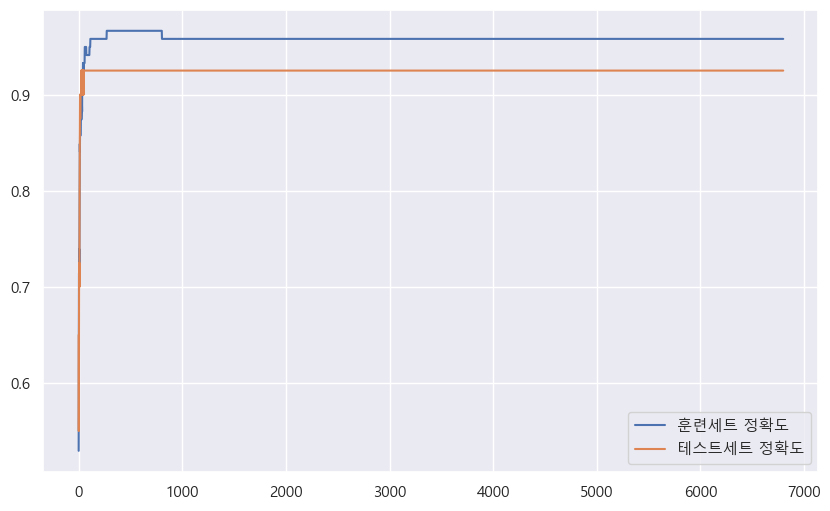

In [142]:
plt.figure(figsize=(10,6))
plt.plot(train_score, label ='훈련세트 정확도')
plt.plot(test_scroe, label = '테스트세트 정확도')
plt.legend()
plt.show()

- 훈련세트는 300번 반복에 따라 정확도가 올라가지만
- 테스트세트는 50번 이상으로 올라가도 정확도가 변함이없다
- 고로 60번 정도만 반복해도 정확도에 차이가 없다는 결론

In [143]:
sc3 = SGDClassifier(loss='log_loss', max_iter=70, random_state=42)
sc3.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=70, random_state=42)

In [145]:
sc3.score(train_scaled, train_target)

0.8739495798319328

In [148]:
sc3.score(test_scaled, test_target)

0.8

- 조기종료

In [157]:
# early_stopping=True > 더 이상 정확도에 큰 변화가 없다면 300번 다하지말고 조기종료시켜줘
sc4 = SGDClassifier(loss='log_loss', max_iter=300, early_stopping=True, tol=0.1e-3, random_state=42)
sc4.fit(train_scaled, train_target)

SGDClassifier(early_stopping=True, loss='log_loss', max_iter=300,
              random_state=42, tol=0.0001)

In [158]:
sc4.score(train_scaled, train_target)

0.7310924369747899

In [159]:
sc4.score(test_scaled, test_target)

0.75

- SGDClassifier() 함수의 기본 손실함수 hinge 손실함수

In [192]:
sc4 = SGDClassifier(loss='hinge', max_iter=100, random_state=42, tol=None)
sc4.fit(train_scaled, train_target)

sc4.score(train_scaled,train_target)

0.9495798319327731

In [193]:
sc4.score(test_scaled, test_target)

0.925

#### 결론
- `확률적 경사하강법` - 훈련세트에서 샘플 하나씩 거내 손실함수 경사에 따라 최적의 모델을 찾는 알고리즘
- `손실함수` - 확률적 경사하강법이 최적화할 대상.
- `에포크` - 전체 샘플을 모두 사용한 훈련한 반복횟수
    - 반복을 많이 한다고 해서 결과가 좋아지는 것은 아님
    - loss, tol, early_stopping등 하이퍼파라미터 값을 적절히 변경해야 함